Explore the logistic regression feature coefficients.

In [3]:
import sys
sys.path.append("..")
import numpy as np
from glob import glob
from run_models import load_model
import os
import matplotlib.pyplot as plt
from variables import SDG_MAP
import pandas as pd
import seaborn as sns
from variables import SDG_COLORS, REVERSE_SDG_MAP

sdg_order = list(REVERSE_SDG_MAP.values())

# Load models


In [4]:
model_paths = glob("../data/trained_models/*-logistic_regression.dill")

<Figure size 640x480 with 0 Axes>

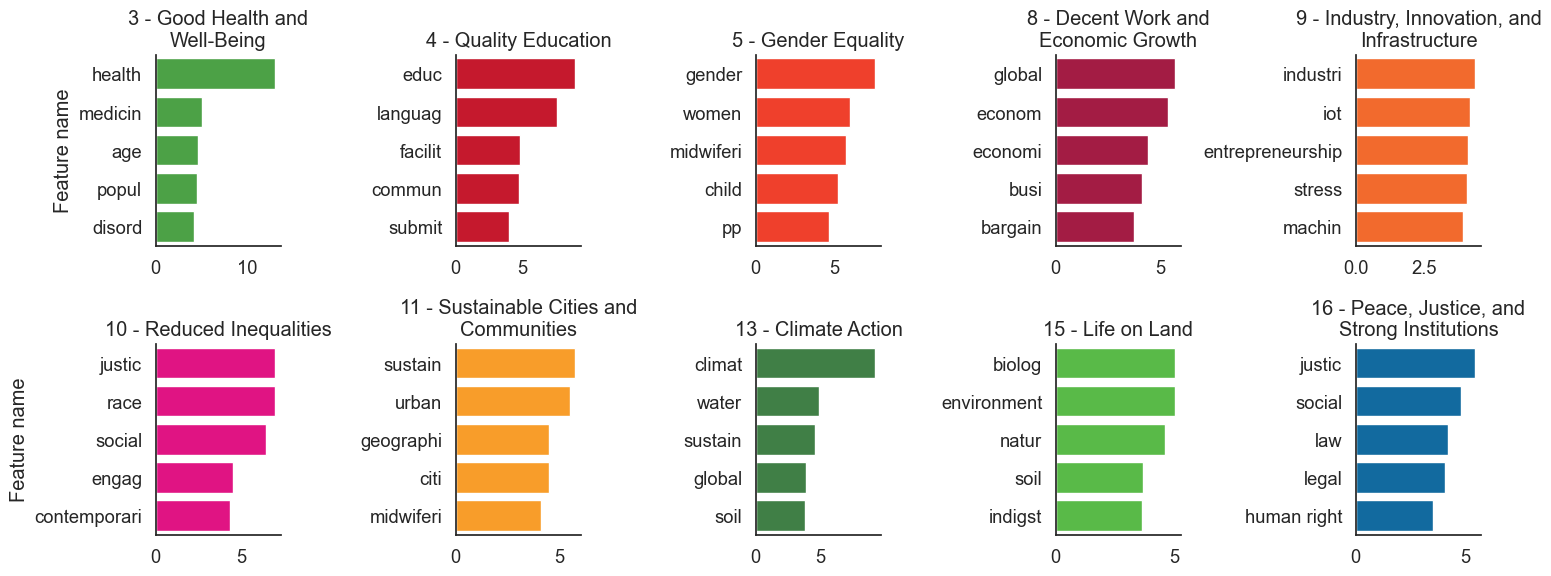

In [8]:
coef_data = []
for path in model_paths:
    model = load_model(path)

    tfidf = model.model['tfidf']
    classifier = model.model['classifier']
    feature_names = tfidf.get_feature_names_out()
    coef = classifier.coef_[0]
    sorted_indices = np.argsort(coef)
    top_indices = sorted_indices[-5:]  # Plotting top 10 terms for better visibility
    bot_indicies = sorted_indices[:5]

    sdg = SDG_MAP[os.path.basename(path).split('-')[0]]

    for i in top_indices[::-1]:
        coef_data.append({
            "Feature name":feature_names[i],
            "Coefficient value": coef[i],
            "SDG": sdg,
            "sdg_short": REVERSE_SDG_MAP[sdg]
        })

coef_data = pd.DataFrame(coef_data)
coef_data = coef_data.loc[np.lexsort((-coef_data['Coefficient value'], coef_data['sdg_short'].apply(lambda s: sdg_order.index(s))))]

ignore = ["SDG 1", "SDG 2", "SDG 6", "SDG 7", "SDG 12", "SDG 14"]
coef_data = coef_data[~coef_data["sdg_short"].isin(ignore)]
fig = plt.figure()
sns.set(font_scale = 1.2)
sns.set_style(style='white')
g = sns.catplot(data=coef_data, x="Coefficient value", y="Feature name", col="SDG", col_wrap=5, sharex=False, sharey=False, kind="bar", height=3, dodge=False)

for ax in g.axes.flatten():
    title = ax.get_title()
    sdg_title = title.replace("SDG = ", "")
    ax.set_title(sdg_title.replace(" and ", " and\n"))
    ax.set_xlabel('')
    for bars in ax.containers:
        for bar in bars:
            bar.set_facecolor(SDG_COLORS[REVERSE_SDG_MAP[sdg_title]])    

g.figure.tight_layout()
plt.savefig(f"../data/presentation_figures/model_coefficients.png", dpi=300, bbox_inches='tight')
plt.show()